From alccols page: https://lhqing.github.io/ALLCools/cell_level/step_by_step/100kb/01-CellBasicFiltering.html
Cell Basic Filtering
Content
The purpose of this step is to get rid of cells having obvious issues, including the cells with low mapping rate (potentially contaminated), low final reads (empty well or lost a large amount of DNA during library prep.), or abnormal methylation fractions (failed in bisulfite conversion or contaminated).

In [ ]:
Input¶
Cell metadata table that contains mapping metric for basic QC filtering.

Output
Filtered cell metadata table that contains only cells passed QC.

In [3]:
conda activate /share/lasallelab/Ensi/anaconda3/allcools/

usage: conda [-h] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'activate' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade', 'build', 'content-trust', 'convert', 'debug', 'develop', 'doctor', 'index', 'inspect', 'metapackage', 'render', 'repoquery', 'skeleton', 'repo', 'verify', 'env', 'server', 'pack', 'token')

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['savefig.transparent'] = True
matplotlib.rcParams['path.simplify'] = False  # keep exact vectors

In [2]:
import pandas as pd
import seaborn as sns

# change this to the path to your metadata
metadata_path = '/quobyte/lasallegrp/Ensi/project/oocytes-macaque/allcools/allcools-subsampled/CellMetadata_PassQC_alloocytes_withyear_mtreads_sub.csv'
# Feature Basic filtering:
# Basic filtering parameters. 
# These are suggesting values, cutoff maybe different for different tissue and sequencing depths.
# To determine each cutoff more appropriately, one need to plot the distribution of each metric.
#mapping_rate_cutoff = 0.5
#mapping_rate_col_name = 'MappingRate'  # Name may change
final_reads_cutoff = 500000
final_reads_col_name = 'TotalRead'  # Name may change
#mccc_cutoff = 0.03
#mccc_col_name = 'mCCCFrac'  # Name may change
#mch_cutoff = 0.2
#mch_col_name = 'mCHFrac'  # Name may change
mcg_cutoff = 0.4
mcg_col_name = 'mCGFrac'  # Name may change


In [3]:

# load metadata
metadata = pd.read_csv(metadata_path, index_col=0, sep="\t")
total_cells = metadata.shape[0]
print(f'Metadata of {total_cells} cells')

metadata

Metadata of 104 cells


,SampleI,AnimalID,Date,Animdate,Collection,Year,Type.of.sample,WellID,WellBarcode,Type,TotalRead,mCGFrac,Group,SampleName,Path,Bamfile,Total.Reads,Mitochondrial.Reads,MT.Fraction,MT.Percentage
SampleID,,,,,,,,,,,,,,,,,,,,
4129944636SOeNC1L1S,4129944636SOeNC1L1,41299,44636,d1,1,2022,Single Oocyte,L1,AACCGTGT,SO,2000000,0.705,Stressed,4129944636SOeNC1L1S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,41299_44636_SOe_NC1_L1_1_val_1_bismark_bt2_pe....,2105900,22264,NaN,NaN
4211144957SO1NC1H4C,4211144957SO1NC1H4,42111,44957,g1,1,2023,Single Oocyte #1,H4,CGATGTTC,SO,2000000,0.675,Control,4211144957SO1NC1H4C_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,42111_44957_SO1_NC1_H4_1_val_1_bismark_bt2_pe....,2009852,41954,NaN,NaN
4499445005SO1NC1P5C,4499445005SO1NC1P5,44994,45005,m2,2,2023,Single Oocyte #1,P5,CATGGATC,SO,2100000,0.602,Control,4499445005SO1NC1P5C_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,44994_45005_SO1_NC1_P5_1_val_1_bismark_bt2_pe....,2128036,16538,NaN,NaN
4146045001PO3NC4G4C,4146045001PO3NC4G4,41460,45001,f2,2,2023,Pooled Oocytes (4) #3,G4,TCGTGCAT,PO,2200000,0.689,Control,4146045001PO3NC4G4C_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,41460_45001_PO3_NC4_G4_1_val_1_bismark_bt2_pe....,2535512,8738,NaN,NaN
4499445005SO3NC1D6C,4499445005SO3NC1D6,44994,45005,m2,2,2023,Single Oocyte #3,D6,TGCGTAAC,SO,2200000,0.653,Control,4499445005SO3NC1D6C_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,44994_45005_SO3_NC1_D6_1_val_1_bismark_bt2_pe....,2550590,16800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265145042SO3NC1F5S,4265145042SO3NC1F5,42651,45042,i1,1,2023,Single Oocyte #3,F5,CACACATC,SO,28700000,0.698,Stressed,4265145042SO3NC1F5S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,42651_45042_SO3_NC1_F5_1_val_1_bismark_bt2_pe....,33733488,50188,NaN,NaN
4302844664PO2NC5K5C,4302844664PO2NC5K5,43028,44664,j1,1,2022,Pooled Oocytes (5) #2,K5,AGCGAGAT,PO,33700000,0.715,Control,4302844664PO2NC5K5C_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,43028_44664_PO2_NC5_K5_1_val_1_bismark_bt2_pe....,37117632,64892,NaN,NaN
4139144923PO1NC3H3C,4139144923PO1NC3H3,41391,44923,e1,1,2022,Pooled Oocytes (3) #1,H3,AGTCGAAG,PO,42800000,0.700,Control,4139144923PO1NC3H3C_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,41391_44923_PO1_NC3_H3_1_val_1_bismark_bt2_pe....,48057090,18402,NaN,NaN


104 / 104 cells (100.0%) passed the TotalRead cutoff 500000.


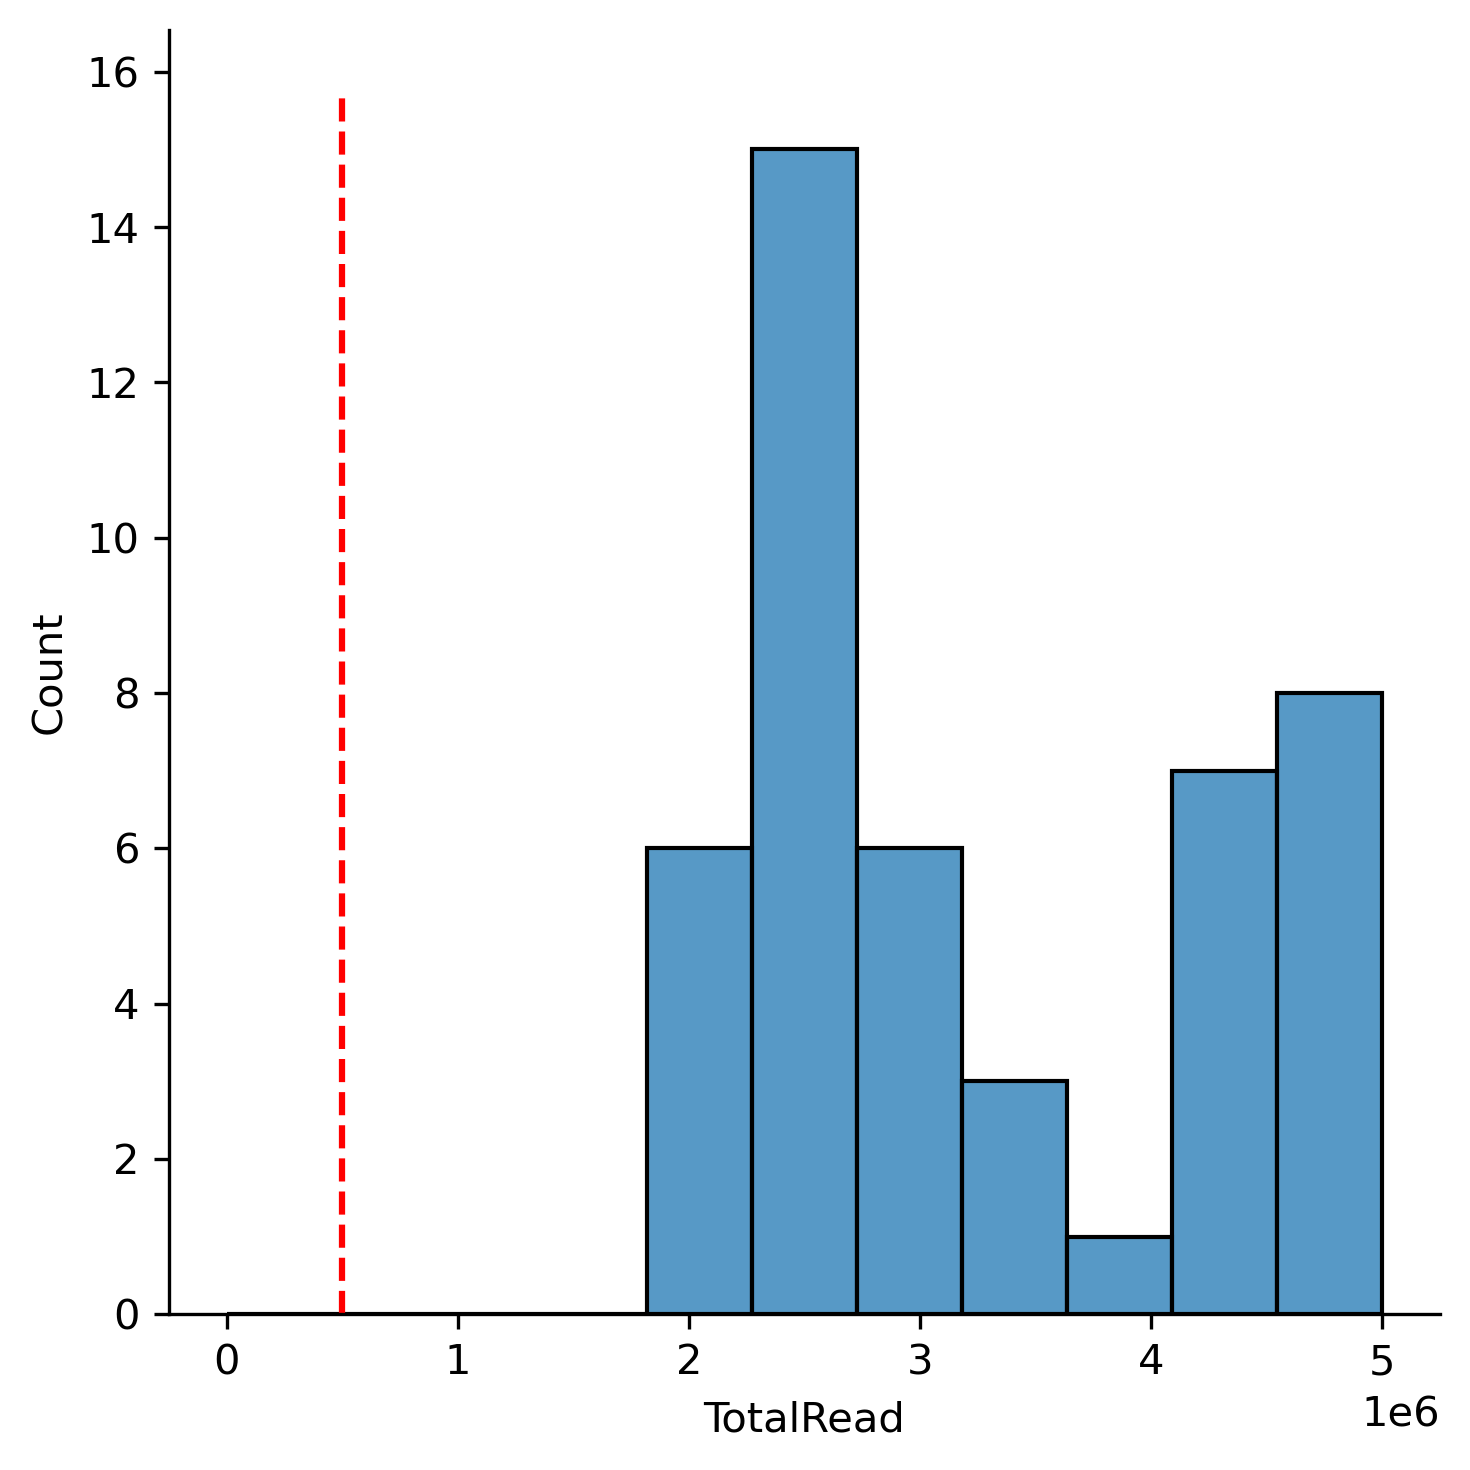

104 / 104 cells (100.0%) passed the mCGFrac cutoff 0.4.
104 / 104 cells (100.0%) passed all the filters.


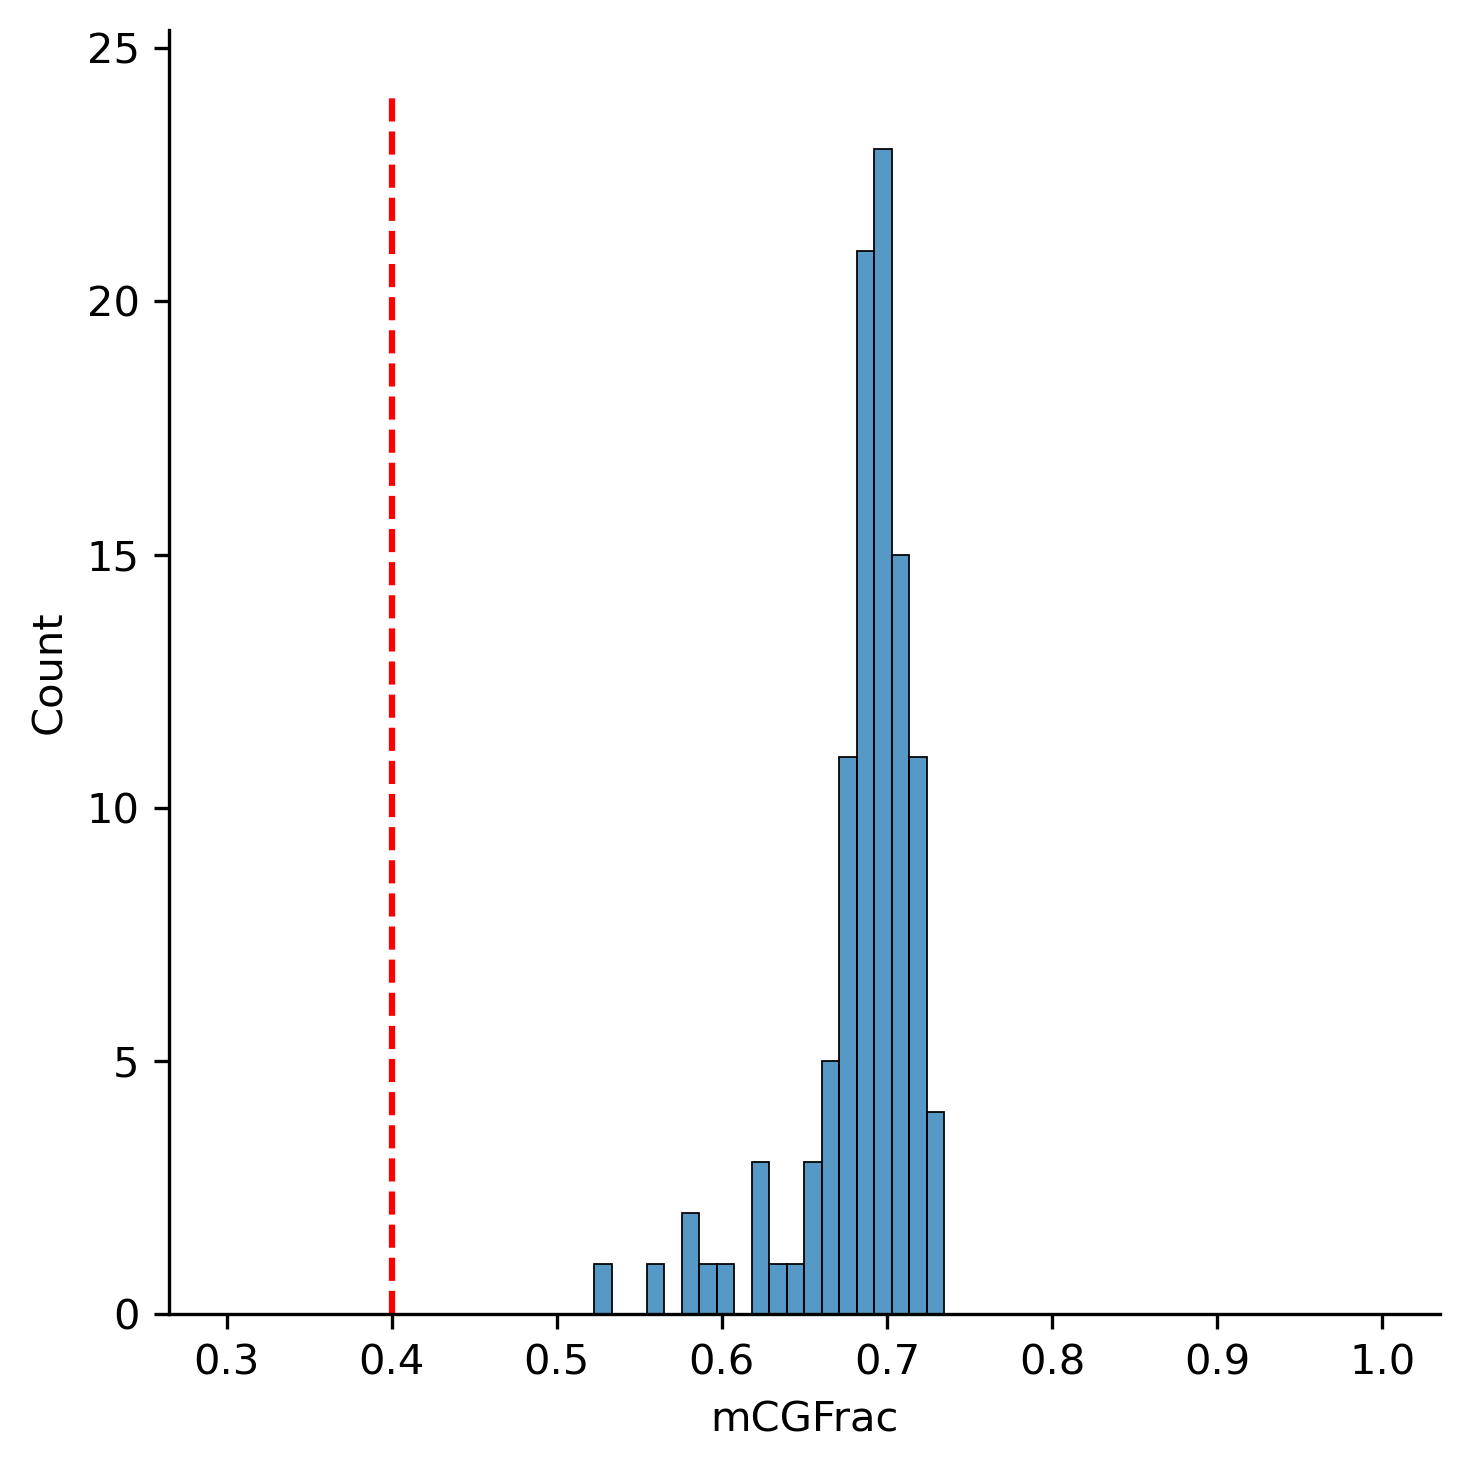

In [6]:


#readfilter
_cutoff = final_reads_cutoff
_col_name = final_reads_col_name

# plot distribution to make sure cutoff is appropriate
g = sns.displot(metadata[_col_name], binrange=(0, 5e6))
g.ax.plot((_cutoff, _cutoff), g.ax.get_ylim(), c='r', linestyle='--')

final_reads_judge = metadata[_col_name] > _cutoff
_passed_cells = final_reads_judge.sum()
print(
    f'{_passed_cells} / {total_cells} cells ({_passed_cells / total_cells * 100:.1f}%) '
    f'passed the {_col_name} cutoff {_cutoff}.')
#plt.savefig("05a_readfilter.png")
plt.savefig("panela-1_sf1.pdf")
plt.show()
# mCG Filter    

_cutoff = mcg_cutoff
_col_name = mcg_col_name

# plot distribution to make sure cutoff is appropriate
g = sns.displot(metadata[_col_name], binrange=(0.3, 1))
g.ax.plot((_cutoff, _cutoff), g.ax.get_ylim(), c='r', linestyle='--')

mcg_judge = metadata[_col_name] > _cutoff
_passed_cells = mcg_judge.sum()
print(
    f'{_passed_cells} / {total_cells} cells ({_passed_cells / total_cells * 100:.1f}%) '
    f'passed the {_col_name} cutoff {_cutoff}.')
#plt.savefig("05a_mCpGfilter.png")

# combine filters       
judge = final_reads_judge & mcg_judge
passed_cells = judge.sum()
print(
    f'{passed_cells} / {total_cells} cells ({passed_cells / total_cells * 100:.1f}%) '
    f'passed all the filters.')



In [7]:

# save filtered methadata       
metadata_filtered = metadata[judge].copy()

metadata_filtered.to_csv('CellMetadata.PassQC.csv')



NameError: name 'judge' is not defined